In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [126]:
# input
input_values = np.array([[0,0],[0,1],[1,1],[1,0]])
input_values

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 0]])

In [127]:
#output
output = np.array([0,1,1,0])
output = output.reshape(4,1)

In [128]:
#weights
weights = np.array([[0.1],[0.2]])

In [129]:
#bias
bias = 0.3

In [ ]:
#activation func 2 (ativação pela tangente hiperbolica)
def tan_H(x):
    return np.tanh(x)

#sech
def sech(x):
    return 1/(np.cosh(x))

#derivative of tanh
def der_tanh(x):
    return 1 - tan_H(x)**2

In [150]:
#activation func (ativação pela sigmoide)
def sigmoid_func(x):
    return 1/(1+np.exp(-x))

#derivative of sigmoid
def der(x):
    return sigmoid_func(x) * (1-sigmoid_func(x))

In [163]:
#criando atributos da rede

# input
input_values = np.array([[0,0],[0,1],[1,1],[1,0]])

#output
output = np.array([0,1,1,0]).reshape(4,1)

#weights
weights = np.array([[0.1],[0.2]])

#bias
bias = 0.3

In [204]:
#treino da rede
for epoch in range(100000):
    input_arr = input_values
    
    weighted_sum = np.dot(input_arr, weights) + bias
    first_output = sigmoid_func(weighted_sum)
    
    #mean square error
    error = first_output - output
    total_error = np.square(np.subtract(first_output,output)).mean()
    
    #calculo da derivativa para incorporar no gradient descent
    first_der = error
    second_der = der(first_output)
    derivative = first_der * second_der
    
    t_input = input_values.T
    final_derivative = np.dot(t_input,derivative)
    
    #update weights
    weights = weights - 0.05 * final_derivative
    #print(derivative)
    
    #update bias
    for i in derivative:
        bias = bias - 0.05 * i

print(weights)
print(bias)

[[-0.40698363]
 [15.03737134]]
[-7.23225376]


In [209]:
#previsões
pred = np.array([0,1])
#no input e output setado para treinar a rede, o input [0,1] deve resultar em 1

result = np.dot(pred, weights) + bias

func_result = sigmoid_func(result)
print(func_result)
#o resultado foi muito proximo de 1

if func_result > 0.5:
    print(1)
else:
    print(0)

[0.99959252]
1


## graficos das funções de ativação

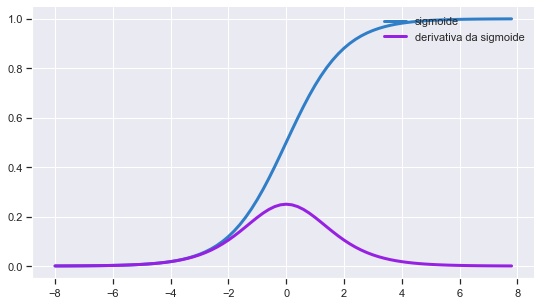

In [196]:
array = pd.Series(np.arange(-8,8,0.2))

fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(array, sigmoid_func(array), color="#307EC7", linewidth=3, label="sigmoide")
ax.plot(array, der(array), color="#9621E2", linewidth=3, label="derivativa da sigmoide")

ax.legend(loc="upper right", frameon=False)

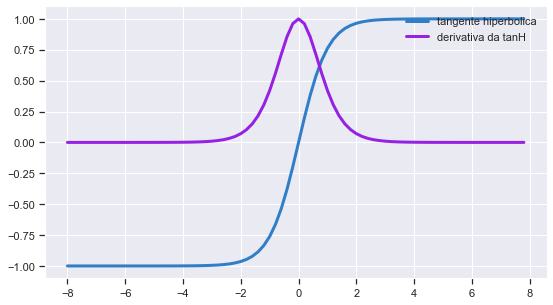

In [200]:
array = pd.Series(np.arange(-8,8,0.2))

fig, ax = plt.subplots(figsize=(9, 5))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(array, tan_H(array), color="#307EC7", linewidth=3, label="tangente hiperbolica")
ax.plot(array, der_tanh(array), color="#9621E2", linewidth=3, label="derivativa da tanH")

ax.legend(loc="upper right", frameon=False)